# Logistic Regression - Performance Evaluation

În partea anterioară am aflat noțiuni teoretice despre partea de evaluare a performanței unui model de clasificare de tip Logistic Regression. În continuare o să punem aceste teorii în aplicare. Pentru asta trebuie să citim setul de date pe care o să lucrăm, trebuie să separăm Features de labels, după care o să împărțim setul de date în train-test split, urmează partea de Scalare a datelor, iar la final se antrenează și se fac predicții cu modelul respectiv. Să realizăm acești pași în Scikit-Learn

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data into a DataFrame
df = pd.read_csv('../data/DATA/hearing_test.csv')

In [3]:
# print the head of the data
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
# split the data into Features and labels
X = df.drop('test_result', axis=1)
y = df['test_result']

In [5]:
# split the data into train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
# crate a scaler and scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Create a LogistRegression Model and train it
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# create prediction with the trained model

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

Putem să ne uităm și la coeficienții acestui model pentru a înțelege un pic mai bine cum lucrează acest model de clasificare.

In [9]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [11]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


Știm că acest model a fost antrenat pe două features, și anume pe age și pe physical_health. Se poate observa că feature-ul de age are ca și coeficient valoarea de -0,949. Ce înseamnă această valoare? Înseamnă că atunci când valoarea de age crește, șansele ca persoana respectivă să treacă testul final scad, ceea ce are sens în realitate. De asemenea, cu valoarea pentru physical_health, putem vedea că atunci când valoarea crește (adică au o stare de sănătate mai bună), atunci șansele ca persoana respectivă să treacă testul cresc. Se poate observa și faptul că este o valoare mai mare pentru coeficientul de physical_score, iar asta înseamnă că are o importanță mai mare acest feature.

Urmează partea în care trebuie să verificăm performanța modelului. După cum am învățat în partea anterioară putem să ne folosim de accuracy, precision, recall, confusion matrix. Aceste metode se găsesc în modului sklearn.metrics. Precum în cazul metricilor de squared_mean_error, și la aceste metode trebuie să oferim ca și input două variabile care țin informațiile de clasele adevărate și clasele prezice de către model (y_true vs. y_pred)

Metodele pe care o să le importăm pentru început sunt accuracy_score, confusion_matrix și classification_report

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

După cum am spus, putem să vedem mai sus că metoda accuracy_score are nevoie de doi parametrii, și anume y_true și y_pred. Să calculăm această valoare de accuracy pentru modelul respectiv

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
accuracy

0.93

Putem să vedem că modelul respectiv are o acuratețe de 93%, dar după cum știm există acel paradox al acurateței pentru un model și nu putem să ne bazăm doar pe asta. În continuare o să afișăm acea matrice (confusion matrix) care ne arată numărul total de valori din categoriile True Positive, True Negative, False Positive și False Negative

In [16]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

Scikit-Learn ne pune la dispoziție o metodă prin care putem să afișăm această matrice într-un grafic (într-un mod mai plăcut). Metoda respectivă poartă denumirea de plot_confusion_matrix() și se găsește în sklearn.metrics. Ceea ce este interesant și ajutător la această metodă este faptul că se poate apela fără a face predicții, putem să îi oferim ca și input modelul, setul de date de testare pe care trebuie să facă predicții și label-urile pentru setul de testare, iar metoda creează plotul respectiv. Acest comportament este util atunci când creem mai multe modele de Clasificare și vrem să vedem care performează cel mai bine fără a fi nevoiți să facem predicții pentru fiecare model în parte

In [17]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


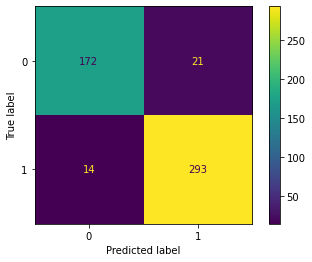

In [19]:
plot_confusion_matrix(model, X_test, y_test)

Până acuma am văzut cum putem să vedem ce acuratețe are modelul și acea confusion matrix. După cum știm, acest accuracy are un paradox și nu putem să ne luăm după valoarea acestuia. Pentru a ne fi afișate valorile pentru precision, recall și f1 score putem să le afișăm din classification_report. Această metodă are nevoie de y_true și y_pred

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

Pentru a avea o afișare mai bună a acestui rezultat trebuie să utiliăm print() deoarece ceea ce este returnat este un string 

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



Din ceea ce se poate vedea mai sus, funcția respectivă returnează precision, recall și f1 score pentru fiecare clasă de valori din ceea ce a fost prezis. Se poate observa faptul că avem valori asemănătore pentru accuracy, precision și recall. Atunci când avem astfel de valori putem să raportăm ca și valoarea a modelului și accuracy deoarece nu avem un imbalans între clase. Metoda de mai sus returenază și numărul total de instanțe din fiecare clasă (cele din y_test) și se poate vedea că nu avem un imbalas la clase.

Dacă se dorelște să se returneze valoarea absolută de precision, recall și f1 score atunci putem să importăm aceste metode din sklearn.metrics

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [23]:
precision_score(y_test, y_pred)

0.9331210191082803

In [24]:
recall_score(y_test, y_pred)

0.9543973941368078

In [25]:
f1_score(y_test, y_pred)

0.9436392914653785

Ce mai putem să facem pentru a evalua performanța unui model este să ne uităm peste ROC_curve și precision_recall_curve. Acestea se pot afișa ca și un grafic utilizând metodele plot_roc_curve și plot_precision_recall_curve din sklearn.metrics

In [26]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

Aceste două funcții funcționează precum cea de plot_confusion_matrix. Are nevoie de un estimator, un set de date de testare și label-ul pentru datele de testare.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


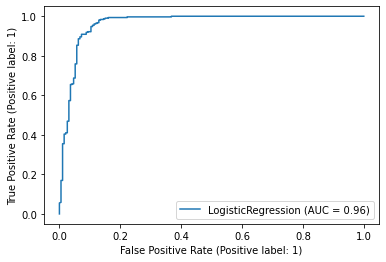

In [27]:
plot_roc_curve(model, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


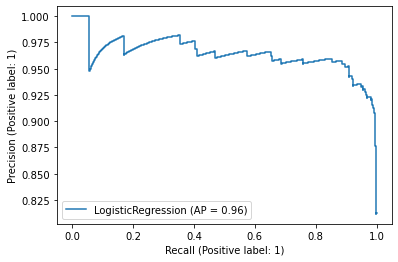

In [28]:
plot_precision_recall_curve(model, X_test, y_test)

Acestea sunt metodele prin care putem să verificăm performanța unui model de clasificare. Valorile rezultate și graficele afișate, dacă acestea sunt cele mai bune sau nu depinde foarte mult de numărul de date pe care se antrenează, de calitatea datelor, de situația în general, nu există o anumită valoare care putem să zicem că este cea bună.

## Recapitulare

În cadrul acestei secțiuni am învățat următoarele lucruri:

    1. De unde să import metricii utilizați pentru verificarea performanței unui model de calsificare

        from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

    2. Există o metodă care retunrează valorile pentru precision, recall și f1 score

        from sklearn.metrics import classification_report
        
        # metoda respectivă returnează precision, recall și f1 score pentru fiecare clasă de predicții

    3. Există o metodă care creează un plot pentru confusion_matrix

        from sklearn.metrics import plot_confusion_matrix

        plot_confusion_matrix(estimator=model, X_test, y_test)

    4. Pentru partea de ROC curve există de asemenea o funcție care creează direct un plot cu acea linie

        from sklearn.metrics import plot_roc_curve

        plot_roc_curve(estimator=model, X_test, y_test)